>>Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

>>Dataset

In [ ]:
df = pd.read_csv("faults.csv")
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


>> Análise e Pré-processamento

In [ ]:
print(df.isnull().sum())
print(df.info())

>>Conjuntos de Treinamento e Teste
>>>Variáveis Preditoras e Rótulos

In [ ]:
X = df.drop(columns=['Other_Faults'])
y = df['Other_Faults']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

>>Transformação

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

>>Modelo de Mineração

No contexto de Máquinas de Vetores de Suporte (SVM), o kernel é uma função utilizada para criar separações não-lineares entre classes, transformando o problema original para um espaço de maior dimensão onde as classes possam ser separadas mais facilmente. Em outras palavras, o kernel define como os dados são mapeados para esse espaço transformado.

O SVM busca encontrar um hiperplano de separação ótimo que maximize a margem entre as classes. Em casos simples, onde os dados são linearmente separáveis, o SVM pode encontrar esse hiperplano diretamente. Porém, em problemas mais complexos, onde as classes não são linearmente separáveis, um mapeamento para um espaço de maior dimensão permite que o SVM encontre uma separação, justamente o kernel.

>>> Tipos de Kernel


**Linear :**

Apropriado para dados que são aproximadamente linearmente separáveis.
A função linear é direta e computacionalmente simples, sendo adequada para datasets grandes e de alta dimensão.

**Polinomial:**

Útil para dados onde as classes possuem uma relação polinomial.
A ordem do polinômio (grau) é um hiperparâmetro que determina a complexidade da curva de separação.


**Gaussiano** (ou RBF - Radial Basis Function):

Ideal para problemas onde a fronteira entre as classes é altamente não-linear.
Cria uma separação baseada na distância dos pontos ao longo de uma função gaussiana.


**Sigmoid:**

Apropriado para redes neurais, pois é similar a uma função de ativação sigmoide.
Menos comum que o RBF e o polinomial, mas pode ser útil em contextos específicos.


A escolha do kernel depende da natureza dos dados e da complexidade do problema. O kernel linear é eficiente para problemas simples, enquanto o RBF e o polinomial são usados em problemas mais complexos, onde as classes não são linearmente separáveis. A escolha correta do kernel impacta a precisão e a capacidade de generalização do modelo.

In [ ]:
modelo_svm = SVC(kernel='rbf', random_state=42)
modelo_svm.fit(X_train, y_train)

SVC(random_state=42)

>>Avaliação e Validação

In [ ]:
y_pred = modelo_svm.predict(X_test)
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Matriz de Confusão:
[[246   0]
 [  1 142]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       246
           1       1.00      0.99      1.00       143

    accuracy                           1.00       389
   macro avg       1.00      1.00      1.00       389
weighted avg       1.00      1.00      1.00       389



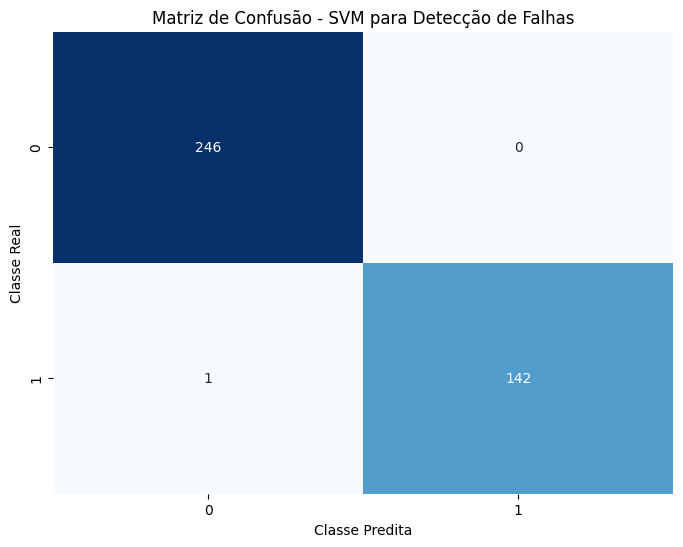

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Matriz de Confusão - SVM para Detecção de Falhas")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.show()

>>Predição

>>>**Aplicação ( *Visão de Negócio*... )**

In [ ]:
def realizar_predicao(modelo, scaler, novas_amostras):
    # Verifica se o input é uma única amostra ou um conjunto de amostras
    if len(novas_amostras.shape) == 1:
        novas_amostras = novas_amostras.reshape(1, -1)

    novas_amostras_normalizadas = scaler.transform(novas_amostras)

    predicoes = modelo.predict(novas_amostras_normalizadas)

    return predicoes

In [ ]:
novas_amostras = np.array([
    [60, 12.3, 14.2, 0.45, 0.35, 0.5, 1.2, 0.9, 15.3, 23.0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
    [75, 8.7, 20.5, 0.55, 0.28, 0.4, 1.0, 1.1, 16.0, 18.5, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0]
])

predicoes = realizar_predicao(modelo_svm, scaler, novas_amostras)

for i, pred in enumerate(predicoes, 1):
    print(f"Amostra {i} - Classe Predita: {pred}")


Amostra 1 - Classe Predita: 0
Amostra 2 - Classe Predita: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
